In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [111]:
data = pd.read_csv('/Users/ritheshdonthoju/Downloads/archive (3)/ER Wait Time Dataset.csv')

In [112]:
data.head()

,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10 20:20:56,Saturday,Winter,Late Morning,Medium,4,3,92,17,22,66,105,Discharged,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28 02:07:47,Thursday,Fall,Evening,Medium,4,0,38,9,30,30,69,Discharged,3
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,2024-09-30 04:02:28,Monday,Fall,Evening,Low,5,1,38,38,40,125,203,Discharged,1
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,2024-02-27 00:31:13,Tuesday,Winter,Evening,High,4,5,94,8,16,64,88,Discharged,2
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,2024-03-06 16:52:26,Wednesday,Spring,Afternoon,Low,4,8,74,26,29,63,118,Discharged,1


In [113]:
data.dropna(subset=["Time of Day"], inplace=True)


In [114]:
data.shape

(5000, 19)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Visit ID                            5000 non-null   object
 1   Patient ID                          5000 non-null   object
 2   Hospital ID                         5000 non-null   object
 3   Hospital Name                       5000 non-null   object
 4   Region                              5000 non-null   object
 5   Visit Date                          5000 non-null   object
 6   Day of Week                         5000 non-null   object
 7   Season                              5000 non-null   object
 8   Time of Day                         5000 non-null   object
 9   Urgency Level                       5000 non-null   object
 10  Nurse-to-Patient Ratio              5000 non-null   int64 
 11  Specialist Availability             5000 non-null   int6

In [116]:
data.describe()

,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Satisfaction
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.238200,3.875000,87.118800,11.704200,24.827000,45.385400,81.916600,2.771600
std,1.200895,3.043292,57.998585,10.437284,24.807994,35.619975,68.084538,1.424584
min,1.000000,0.000000,10.000000,0.000000,1.000000,2.000000,4.000000,1.000000
25%,3.000000,1.000000,36.000000,3.000000,6.000000,17.000000,27.000000,1.000000
50%,3.000000,3.000000,74.000000,8.000000,16.000000,35.000000,60.000000,3.000000
75%,4.000000,6.000000,138.000000,18.000000,36.000000,66.000000,122.000000,4.000000
max,5.000000,10.000000,200.000000,66.000000,163.000000,233.000000,442.000000,5.000000


In [117]:
# Define relevant features and target variable
features = ["Specialist Availability", "Time of Day", "Day of Week"]
target = "Total Wait Time (min)"

# Extract relevant columns
df = data[features + [target]]

# Display dataset summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Specialist Availability  5000 non-null   int64 
 1   Time of Day              5000 non-null   object
 2   Day of Week              5000 non-null   object
 3   Total Wait Time (min)    5000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 156.4+ KB


In [118]:
print("Unique values in 'Time of Day' before encoding:", df["Time of Day"].unique())


Unique values in 'Time of Day' before encoding: ['Late Morning' 'Evening' 'Afternoon' 'Night' 'Early Morning']


In [119]:
df["Time of Day"] = df["Time of Day"].fillna("Unknown")  # Fill missing with 'Unknown'


/var/folders/hv/_2w0z4dd4wg310zgvn3y6cd00000gn/T/ipykernel_70846/4041080884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time of Day"] = df["Time of Day"].fillna("Unknown")  # Fill missing with 'Unknown'


In [120]:
df["Time of Day"] = df["Time of Day"].str.strip()


/var/folders/hv/_2w0z4dd4wg310zgvn3y6cd00000gn/T/ipykernel_70846/2875078190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time of Day"] = df["Time of Day"].str.strip()


In [121]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/Users/ritheshdonthoju/Downloads/archive (3)/ER Wait Time Dataset.csv')

# Define categorical features
categorical_features = ["Time of Day", "Day of Week"]

# Create a copy of the dataset
df_encoded = df.copy()

# Dictionary to store label encoders
label_encoders = {}

# Encode categorical features
for col in categorical_features:
    if col in df.columns:  # Ensure the column exists
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
        label_encoders[col] = le  # Store encoder for later use

# Verify if encoding worked correctly
print("✅ Encoding Complete!")
print("Unique encoded values in 'Time of Day':", df_encoded["Time of Day"].unique())
print("Unique encoded values in 'Day of Week':", df_encoded["Day of Week"].unique())

# Display transformed dataset
df_encoded.head()


✅ Encoding Complete!
Unique encoded values in 'Time of Day': [3 2 0 4 1]
Unique encoded values in 'Day of Week': [2 4 1 5 6 0 3]


,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10 20:20:56,2,Winter,3,Medium,4,3,92,17,22,66,105,Discharged,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28 02:07:47,4,Fall,2,Medium,4,0,38,9,30,30,69,Discharged,3
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,2024-09-30 04:02:28,1,Fall,2,Low,5,1,38,38,40,125,203,Discharged,1
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,2024-02-27 00:31:13,5,Winter,2,High,4,5,94,8,16,64,88,Discharged,2
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,2024-03-06 16:52:26,6,Spring,0,Low,4,8,74,26,29,63,118,Discharged,1


In [122]:
# Define X (features) and y (target)
X = df_encoded[features]
y = df_encoded[target]

# Display first few rows of X
X.head()


,Specialist Availability,Time of Day,Day of Week
0,3,3,2
1,0,2,4
2,1,2,1
3,5,2,5
4,8,0,6


In [123]:
from sklearn.model_selection import train_test_split

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4000, 3), (1000, 3), (4000,), (1000,))

In [124]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [125]:
# Predict on the test set
y_pred = model.predict(X_test)

# Display first few predictions
y_pred[:10]


array([87.80762313, 82.28037313, 75.1734171 , 78.41100552, 75.56834361,
       83.96987028, 89.49712028, 74.84172012, 80.76389662, 88.23416441])

In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 54.751157536059516
Mean Squared Error (MSE): 4652.101331010517
Root Mean Squared Error (RMSE): 68.20631445116
R² Score: 9.880381371840663e-06


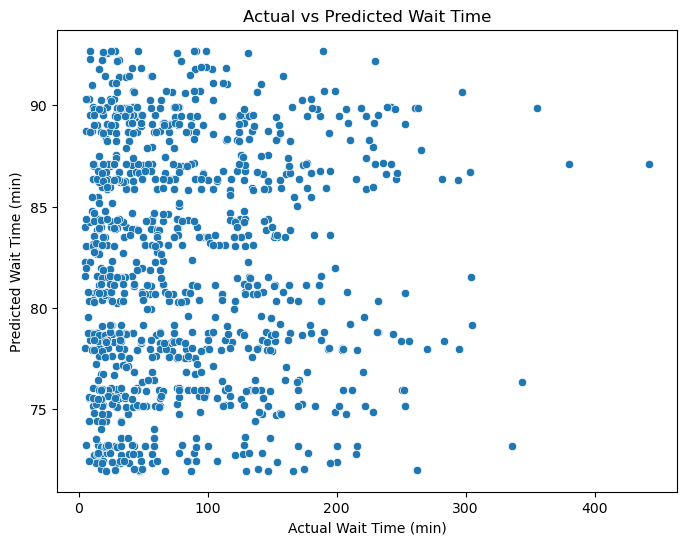

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Wait Time (min)")
plt.ylabel("Predicted Wait Time (min)")
plt.title("Actual vs Predicted Wait Time")
plt.show()


In [128]:
# Display model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [ 0.39492651 -0.03161476 -2.77943238]
Model Intercept: 88.7388820246105


In [129]:
# Define mapping for Day of Week
day_of_week_mapping = {
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
    4: "Thursday", 5: "Friday", 6: "Saturday"
}

# Define mapping for Time of Day
time_of_day_mapping = {
    0: "Early Morning",1: "Late Morning",
    2: "Afternoon", 3: "Evening", 4: "Night"
}

# Reverse mappings for encoding
reverse_day_of_week_mapping = {v: k for k, v in day_of_week_mapping.items()}
reverse_time_of_day_mapping = {v: k for k, v in time_of_day_mapping.items()}


In [130]:


# Define mappings for user input
time_of_day_mapping = {0: "Early Morning", 1: "Late Morning", 2: "Afternoon", 3: "Evening", 4: "Night"}
day_of_week_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

def predict_wait_time():
    # Get user inputs
    specialist_availability = int(input("Enter Specialist Availability (e.g., 5): ").strip())
    time_of_day = int(input("Enter Time of Day (0: Early Morning, 1: Late Morning, 2: Afternoon, 3: Evening, 4: Night): ").strip())
    day_of_week = int(input("Enter Day of Week (0: Sunday, 1: Monday, ..., 6: Saturday): ").strip())

    # Convert numeric input back to categorical labels for encoding
    time_of_day_label = time_of_day_mapping[time_of_day]
    day_of_week_label = day_of_week_mapping[day_of_week]

    # Encode categorical values using stored label encoders
    time_of_day_encoded = label_encoders["Time of Day"].transform([time_of_day_label])[0]
    day_of_week_encoded = label_encoders["Day of Week"].transform([day_of_week_label])[0]

    # Create input array
    input_data = np.array([[specialist_availability, time_of_day_encoded, day_of_week_encoded]])

    # Predict wait time
    predicted_wait_time = model.predict(input_data)[0]

    print(f"\nPredicted Wait Time: {predicted_wait_time:.2f} minutes")

# Call function to take user input and predict wait time
predict_wait_time()


Enter Specialist Availability (e.g., 5):  5
Enter Time of Day (0: Early Morning, 1: Late Morning, 2: Afternoon, 3: Evening, 4: Night):  4
Enter Day of Week (0: Sunday, 1: Monday, ..., 6: Saturday):  0



Predicted Wait Time: 82.25 minutes


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
